## Bank Product Uptake Prediction
- The binary classification goal is to predict if the client will subscribe a term deposit (variable y).

### Problem Statement 
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

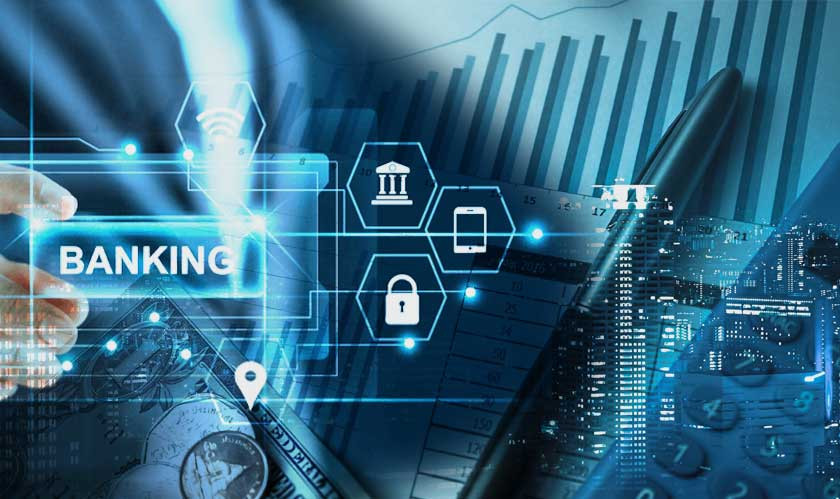

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd

# visuals libraries
import math
import glob


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None
import datetime as dt

In [2]:
# read and load file
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Data Science and ML\Quantum Slides\bank.csv')

In [3]:
# head of the file
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# tail of the file 
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
df['month'] = df['month'].str.capitalize()

### Features of the Dataset

1 - age (numeric)

2 - job : type of job (categorical:
"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means
divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client
(numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical:
"unknown","other","failure","success")

Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")


### Data Inspection and Manipulation

In [6]:
# shape of the data
df.shape

(4521, 17)

In [7]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  target     4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
# checking null values
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [10]:
# check columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [11]:
# descriptive statistical analysis
df.describe().astype(int)

,age,balance,day,duration,campaign,pdays,previous
count,4521,4521,4521,4521,4521,4521,4521
mean,41,1422,15,263,2,39,0
std,10,3009,8,259,3,100,1
min,19,-3313,1,4,1,-1,0
25%,33,69,9,104,1,-1,0
50%,39,444,16,185,2,-1,0
75%,49,1480,21,329,3,-1,0
max,87,71188,31,3025,50,871,25


## Exploratory Data Analysis And Visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis
- basically, looking at one feature and its visualization

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,Oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,Apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,Jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226,1,-1,0,unknown,no


In [13]:
# count of job category
job_type = df['job'].value_counts().sort_values()
job_type

unknown           38
student           84
housemaid        112
unemployed       128
entrepreneur     168
self-employed    183
retired          230
services         417
admin.           478
technician       768
blue-collar      946
management       969
Name: job, dtype: int64

<AxesSubplot:>

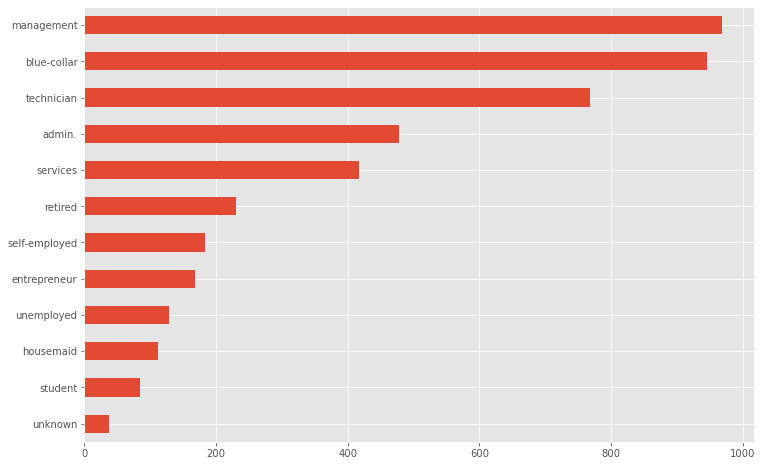

In [14]:
job_type.plot.barh()

### Observation
- it is observed that the management job type has the highest count of 969 followed by blue-collar with about 946 compared to the others.

In [15]:
# count of married
marital_type = df['marital'].value_counts().sort_values()
marital_type

divorced     528
single      1196
married     2797
Name: marital, dtype: int64

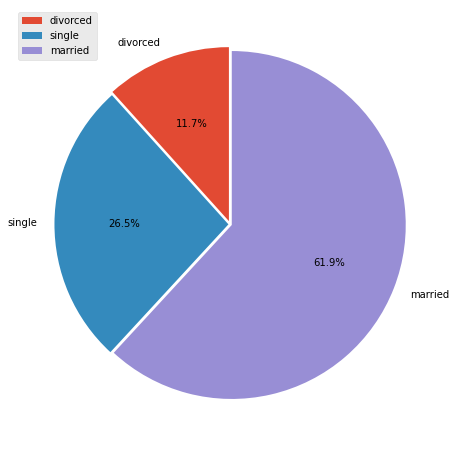

In [16]:
myexplode = [0.02, 0.01, 0.01]
plt.pie(marital_type, labels = marital_type.index, autopct = '%1.1f%%', startangle = 90 , explode = myexplode)
plt.legend(labels = marital_type.index, loc = 'upper left')
plt.show()

### Observation
- it is observed that the married has the highest count of 2797 followed by single with about 1196 compared to divored with about 528. That shows that the married are transacting more with the bank followed by the single.

In [17]:
# count of education category
education_type = df['education'].value_counts().sort_values()
education_type

unknown       187
primary       678
tertiary     1350
secondary    2306
Name: education, dtype: int64

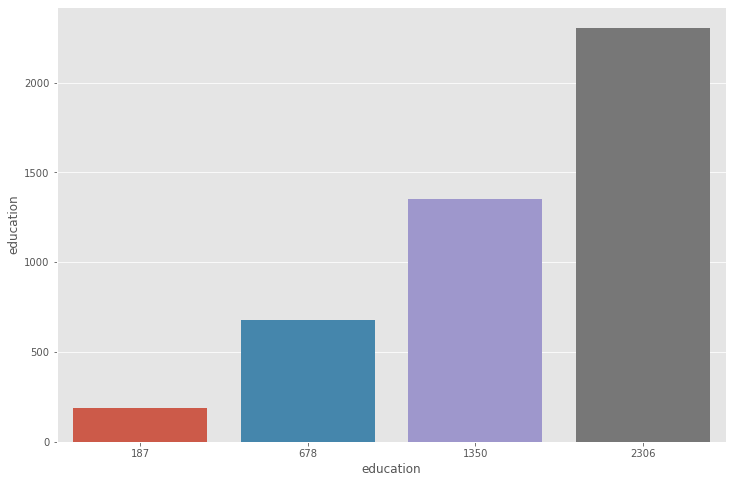

In [18]:
sns.barplot(x = education_type, y = df['education'].value_counts(), data = df )
plt.show()

### Observation
- it is observed that the secondary education type has the highest count of 2306 followed by primary with about 1350 compared to the others.

In [19]:
# count of contact type
contact_type = df['contact'].value_counts()
contact_type

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

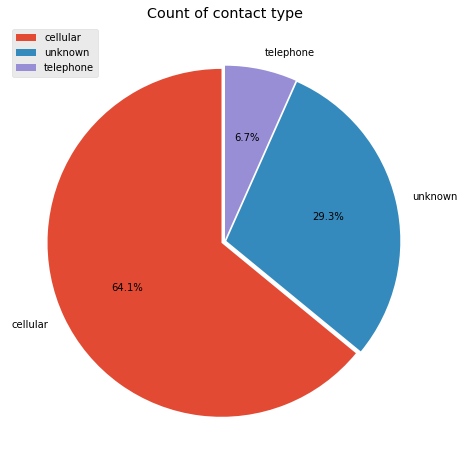

In [20]:
# count of contact type
myexplode = [0.02, 0.01, 0.01]
plt.pie(contact_type, labels = contact_type.index, autopct = '%1.1f%%', startangle = 90 , explode = myexplode)
plt.legend(labels = contact_type.index, loc = 'upper left')
plt.title('Count of contact type')
plt.show()

### Observation
- it is observed that the cellular contact type has the highest percentage of 64.1% followed by the unknown with about 29.1% compared to the others.

In [21]:
# count of previous outcome type
poutcome_type = df['poutcome'].value_counts()
poutcome_type

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

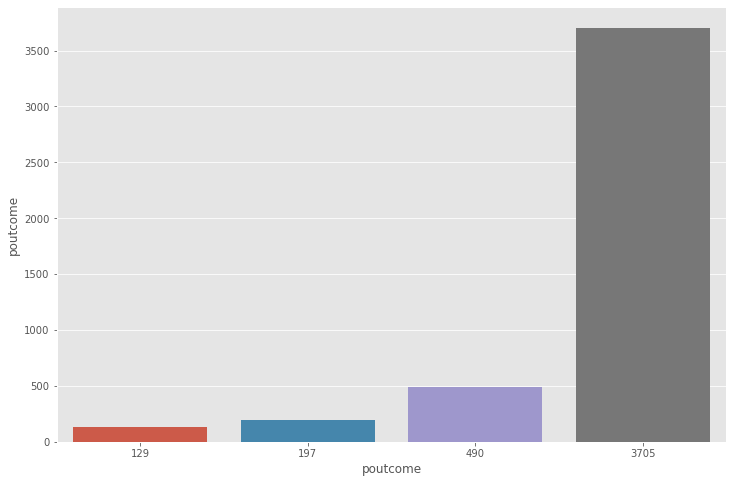

In [22]:
sns.barplot(x = poutcome_type, y = df['poutcome'].value_counts(), data = df )
plt.show()

### Observation
- it is observed that the unknown previous outcome type has the highest count of 3705 followed by failure with about 490 compared to the others.

### Bivariate Analysis
- basically, comparing two features and its visualization

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,Oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,Apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,Jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226,1,-1,0,unknown,no


In [24]:
# convert month name to datetime format
df['month_no'] = pd.to_datetime(df['month'], format = '%b').dt.month

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,month_no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,Oct,79,1,-1,0,unknown,no,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220,1,339,4,failure,no,5
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,Apr,185,1,330,1,failure,no,4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,Jun,199,4,-1,0,unknown,no,6
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226,1,-1,0,unknown,no,5


In [26]:
# balance trend - balance vs month
bal_trnd = df[['balance', 'month']].groupby(df.month_no).sum().sort_values(by = 'month_no', ascending = True)
bal_trnd

,balance
month_no,
1,144502
2,292827
3,100427
4,485812
5,1543635
6,1000825
7,557364
8,920736
9,82646


<AxesSubplot:xlabel='month_no'>

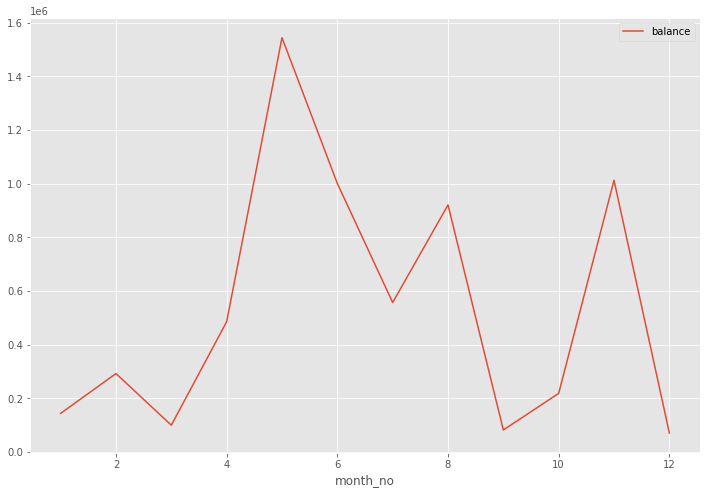

In [27]:
bal_trnd.plot()

### Observation
- it is observed that the month of May has the highest total balance of 1543635 compared to the lowest which is the month of December with a total balance of 71343.

In [28]:
# age trend - average age by month
age_trnd = df[['month_no', 'age']].groupby(df.month).mean().astype('int').sort_values(by = 'month_no')
age_trnd

,month_no,age
month,,
Jan,1,41
Feb,2,41
Mar,3,47
Apr,4,39
May,5,39
Jun,6,42
Jul,7,41
Aug,8,42
Sep,9,39


<AxesSubplot:xlabel='month'>

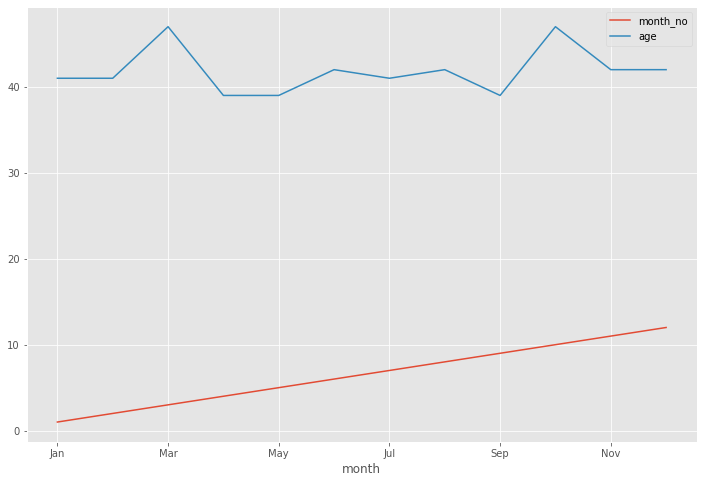

In [29]:
age_trnd.plot()

### Observation
- it is observed that the month of March and October has the highest average age of 47 compared to the other month of the year

In [30]:
# campaign trend - campaign by month
camp_trnd = df['campaign'].groupby(df.month_no).sum()
camp_trnd

month_no
1      266
2      500
3      131
4      547
5     3410
6     1684
7     2608
8     2489
9       85
10     115
11     758
12      37
Name: campaign, dtype: int64

<AxesSubplot:xlabel='month_no'>

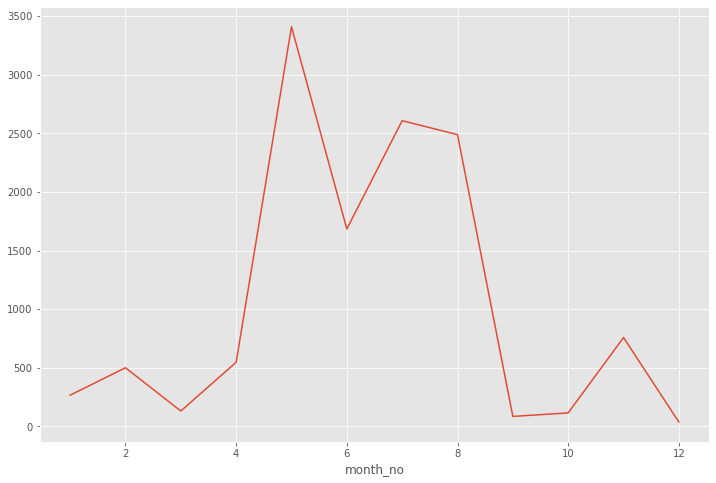

In [31]:
camp_trnd.plot()

### Observation
- it is observed that the month of May has the highest total campaign of 3410 while the month of December has the lowest total campaign of 37 compared to the other month of the year.

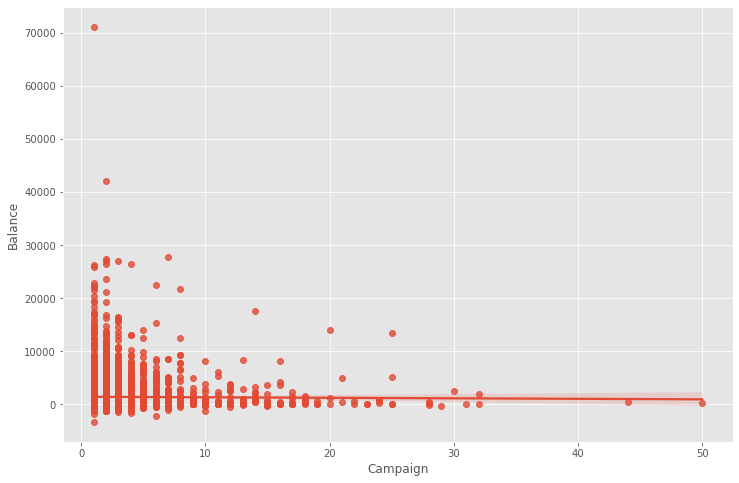

In [32]:
# campaing vs balance
sns.regplot(x = df.campaign, y = df.balance, data = list(range(1, 10, 5)))
plt.xlabel('Campaign')
plt.ylabel('Balance')
plt.show()

### Observation
- it is observed that there was a slight positively correlation between campaign and balance feature.

In [33]:
# marital by job count
mar_job = df['job'].groupby(df.marital).value_counts()
mar_job

marital   job          
divorced  management       119
          technician        89
          blue-collar       79
          admin.            69
          services          62
          retired           43
          unemployed        22
          entrepreneur      16
          self-employed     15
          housemaid         13
          unknown            1
married   blue-collar      693
          management       557
          technician       411
          admin.           266
          services         236
          retired          176
          entrepreneur     132
          self-employed    127
          housemaid         84
          unemployed        75
          unknown           30
          student           10
single    management       293
          technician       268
          blue-collar      174
          admin.           143
          services         119
          student           74
          self-employed     41
          unemployed        31
          entre

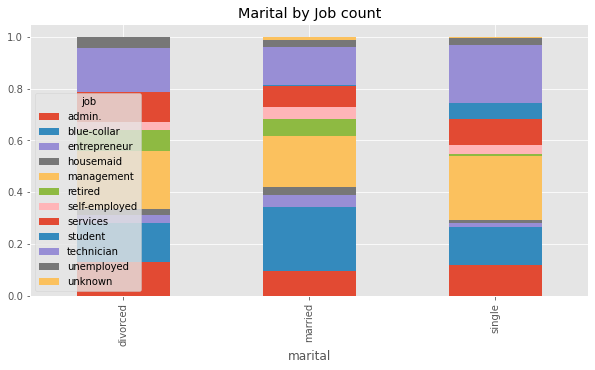

In [34]:
#create pivot of marital and job count
mar_job_pivot = pd.crosstab(df.marital,  df.job, normalize = 'index')

#plot the data
mar_job_pivot.plot.bar(stacked=True, figsize=(10,5))

plt.title('Marital by Job count')
plt.show()

### Observation
- it is observed that for the divorced; management has the highest percentage followed by technician with the unknown being the least proportion, for the married; the blue-collar has the highest proportion followed by management with the student being the least proportion while for the single; the management has the highest proportion followed by the technician with the unknown being the least proportion.

In [35]:
# average age vs job
age_job = df['age'].groupby(df.job).mean().astype('int').sort_values()
age_job

job
student          26
services         38
admin.           39
technician       39
blue-collar      40
management       40
unemployed       40
self-employed    41
entrepreneur     42
housemaid        47
unknown          48
retired          61
Name: age, dtype: int32

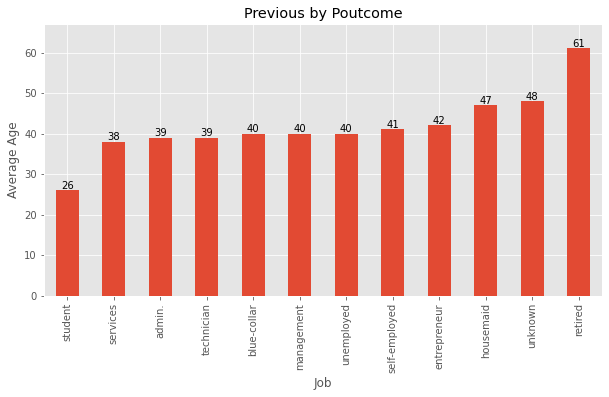

In [36]:
# plot the bar chart to show labels

ax = age_job.plot(kind = 'bar', figsize = (10, 5), title = 'Previous by Poutcome', xlabel = 'Job', 
                  ylabel = 'Average Age', legend = False)

# annotate
ax.bar_label(ax.containers[0], label_type = 'edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y = 0.1)

### Observation
- it is observed that for the retired has the highest average age of about 61 years old compared to the least which is student of about 26 years old.

In [37]:
# default by maximum balance
max_bal_def = df['balance'].groupby(df.default).max()
max_bal_def

default
no     71188
yes     1238
Name: balance, dtype: int64

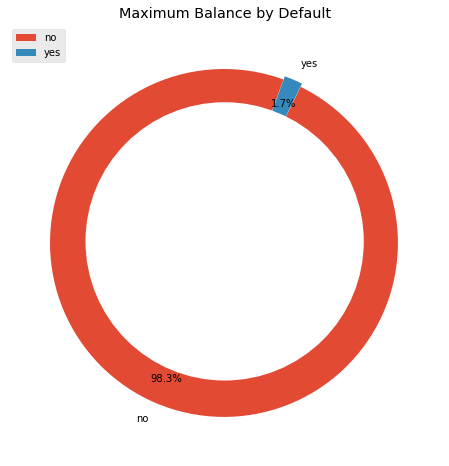

In [38]:
myexplode = [0.01, 0.01]
plt.pie(max_bal_def, labels = max_bal_def.index, autopct = '%1.1f%%', startangle = 70 , explode = myexplode,
        pctdistance = 0.85)
centre_circle = plt.Circle((0,0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels = max_bal_def.index, loc = 'upper left')
plt.title('Maximum Balance by Default')
plt.show()

### Observation
- it is observed that 98.3% of the no default has a maximum balance of 71188 compared to 1.7% of the yes default with a maximum balance of 1238.

In [39]:
# housing by total balance
hou_bal = df['balance'].groupby(df.housing).sum()
hou_bal

housing
no     3129934
yes    3301902
Name: balance, dtype: int64

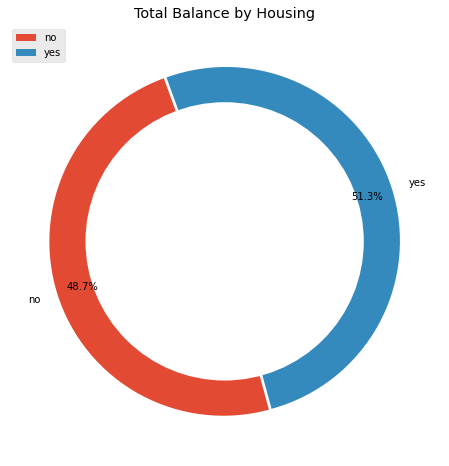

In [40]:
myexplode = [0.008, 0.008]
plt.pie(hou_bal, labels = hou_bal.index, autopct = '%1.1f%%', startangle = 110 , explode = myexplode,
        pctdistance = 0.85)
centre_circle = plt.Circle((0,0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels = hou_bal.index, loc = 'upper left')
plt.title('Total Balance by Housing')
plt.show()

### Observation
- it is observed that 51.3% of the yes housing has a total balance of 3301902 compared to 48.7% of the no housing with a total balance of 3129934.

In [41]:
# loan by total duration
lo_day = round((df['duration'].groupby(df.loan).sum()) / 3600, 1)
lo_day 

loan
no     281.4
yes     50.1
Name: duration, dtype: float64

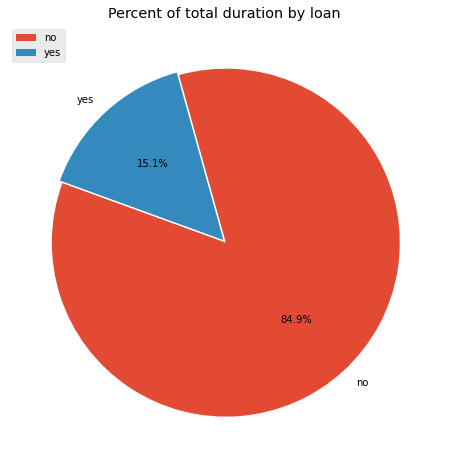

In [42]:
# loan by total duration in hours
myexplode = [0.01, 0.01]
plt.pie(lo_day, labels = lo_day.index, autopct = '%1.1f%%', startangle = 160 , explode = myexplode)
plt.legend(labels = lo_day.index, loc = 'upper left')
plt.title('Percent of total duration by loan')
plt.show()

### Observation
- it is observed that the no loan duration took about 84.9% compared to the yes loan with about 15.1% of total duration in hours.

In [43]:
# loan by day
lo_day = df['loan'].groupby(df.day).value_counts()
lo_day = pd.DataFrame(lo_day)
lo_day.head(60)

loan
day loan      
1   no      22
    yes      5
2   no      98
    yes     16
3   no      90
    yes     15
4   no     115
    yes     24
5   no     158
    yes     23
6   no     160
    yes     27
7   no     158
    yes     32
8   no     134
    yes     46
9   no     133
    yes     30
10  no      38
    yes     12
11  no     137
    yes     15
12  no     141
    yes     10
13  no     147
    yes     19
14  no     167
    yes     28
15  no     146
    yes     28
16  no     132
    yes     32
17  no     161
    yes     30
18  no     189
    yes     37
19  no     172
    yes     29
20  no     233
    yes     24
21  no     162
    yes     36
22  no      81
    yes      5
23  no      82
    yes     20
24  no      30
    yes      6
25  no      57
    yes     23
26  no      98
    yes     12
27  no      95
    yes     18
28  no     151
    yes     30
29  no     144
    yes     31
30  no     150
    yes     18

Text(0, 0.5, 'Count of loan')

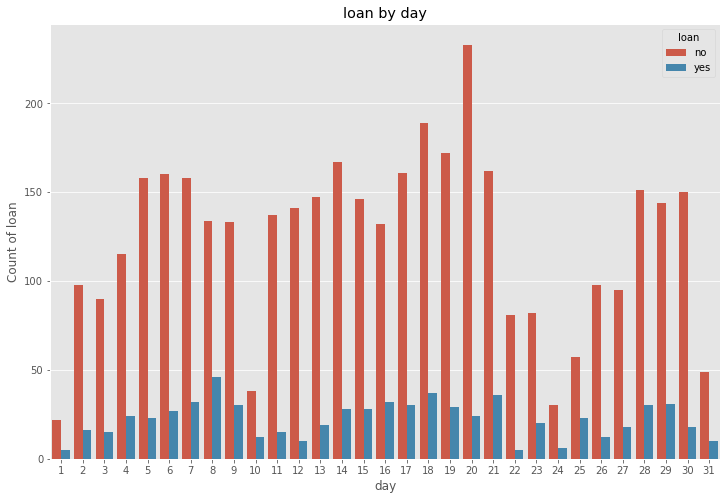

In [44]:
# Visualize loan by day
plt.figure(figsize=(12,8))
sns.countplot(x = 'day', data=df, hue = 'loan')
plt.title('loan by day')
plt.xlabel('day')
plt.ylabel('Count of loan')

### Observation
- it is observed that day 20 has the highest no loan of 233 compared to a lowest of 21 on day 1 while the yes loan has the highest of 133 on day 8 compared to a lowest of 5 on day 1.

In [45]:
# contact by total day
con_day = df['day'].groupby(df.contact).sum()
con_day

contact
cellular     46410
telephone     5288
unknown      20255
Name: day, dtype: int64

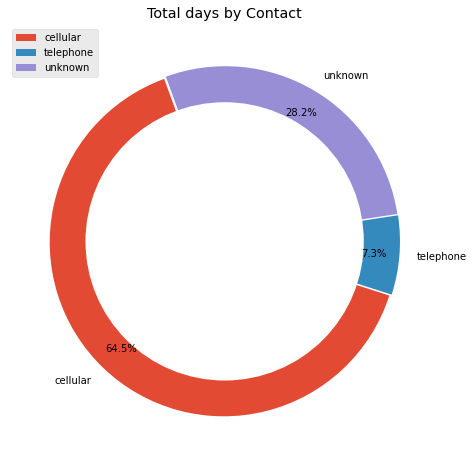

In [46]:
myexplode = [0.008, 0.008, 0.008]
plt.pie(con_day, labels = con_day.index, autopct = '%1.1f%%', startangle = 110 , explode = myexplode,
        pctdistance = 0.85)
centre_circle = plt.Circle((0,0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels = con_day.index, loc = 'upper left')
plt.title('Total days by Contact')
plt.show()

### Observation
- it is observed that cellular contact type has the highest percentage of 64.5% followed by the unknown of about 28.2% while telephone has the lowest of about 7.3% of the total days.

In [47]:
# the count of days by contact
cnt_day = df[ 'day'].groupby(df.contact).mean()
cnt_day

contact
cellular     16.025552
telephone    17.568106
unknown      15.298338
Name: day, dtype: float64

<AxesSubplot:xlabel='contact', ylabel='day'>

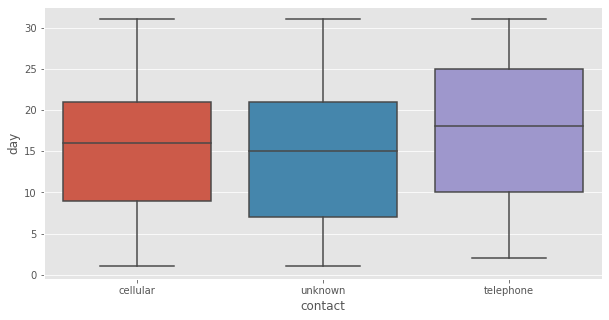

In [48]:
# visual of contact by total day
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'contact', y = 'day', data = df)

### Observation
- it is observed that telephone contact type has the highest average by total days of about 17.6 followed by the cellular of about 16.0 while unknown has the lowest average of about 15.3 of the total days.

In [49]:
# Previous outcome by previous
pout_prev = df['previous'].groupby(df.poutcome).sum()
pout_prev

poutcome
failure    1397
other       667
success     389
unknown       0
Name: previous, dtype: int64

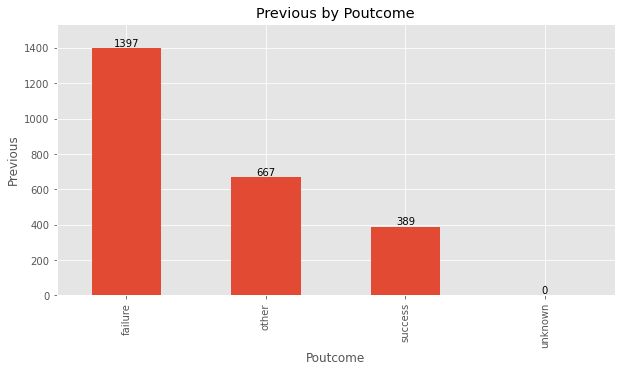

In [50]:
# plot the bar chart to show labels

ax = pout_prev.plot(kind = 'bar', figsize = (10, 5), title = 'Previous by Poutcome', xlabel = 'Poutcome', 
                  ylabel = 'Previous', legend = False)

# annotate
ax.bar_label(ax.containers[0], label_type = 'edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y = 0.1)

### Observation
- it is observed that there 1397 failures based on previous outcomes by previous followed by others with about 667 while the success have on previous outcomes is about 389.

In [51]:
# contact by duration
con_dur = df['duration'].groupby(df.contact).sum()
con_dur

contact
cellular     773558
telephone     73250
unknown      346561
Name: duration, dtype: int64

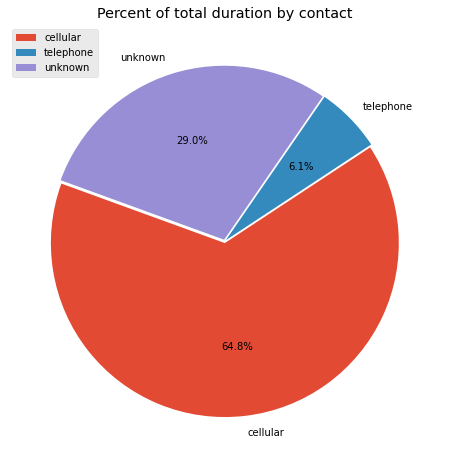

In [52]:
# contact by total duration in hours
myexplode = [0.01, 0.01, 0.01]
plt.pie(con_dur, labels = con_dur.index, autopct = '%1.1f%%', startangle = 160 , explode = myexplode)
plt.legend(labels = con_dur.index, loc = 'upper left')
plt.title('Percent of total duration by contact')
plt.show()

### Observation
- it is observed that cellular contact type has the highest percentage of 64.5% by total durations in hours followed by the unknown of about 29.0% while telephone has the lowest of about 7.3% of the total durations.

### Multivariate Analysis
- it is comparing of three or more features and its visualization

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target,month_no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,Oct,79,1,-1,0,unknown,no,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220,1,339,4,failure,no,5
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,Apr,185,1,330,1,failure,no,4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,Jun,199,4,-1,0,unknown,no,6
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226,1,-1,0,unknown,no,5


Text(0.5, 1.0, 'Marital, Balance and Job ')

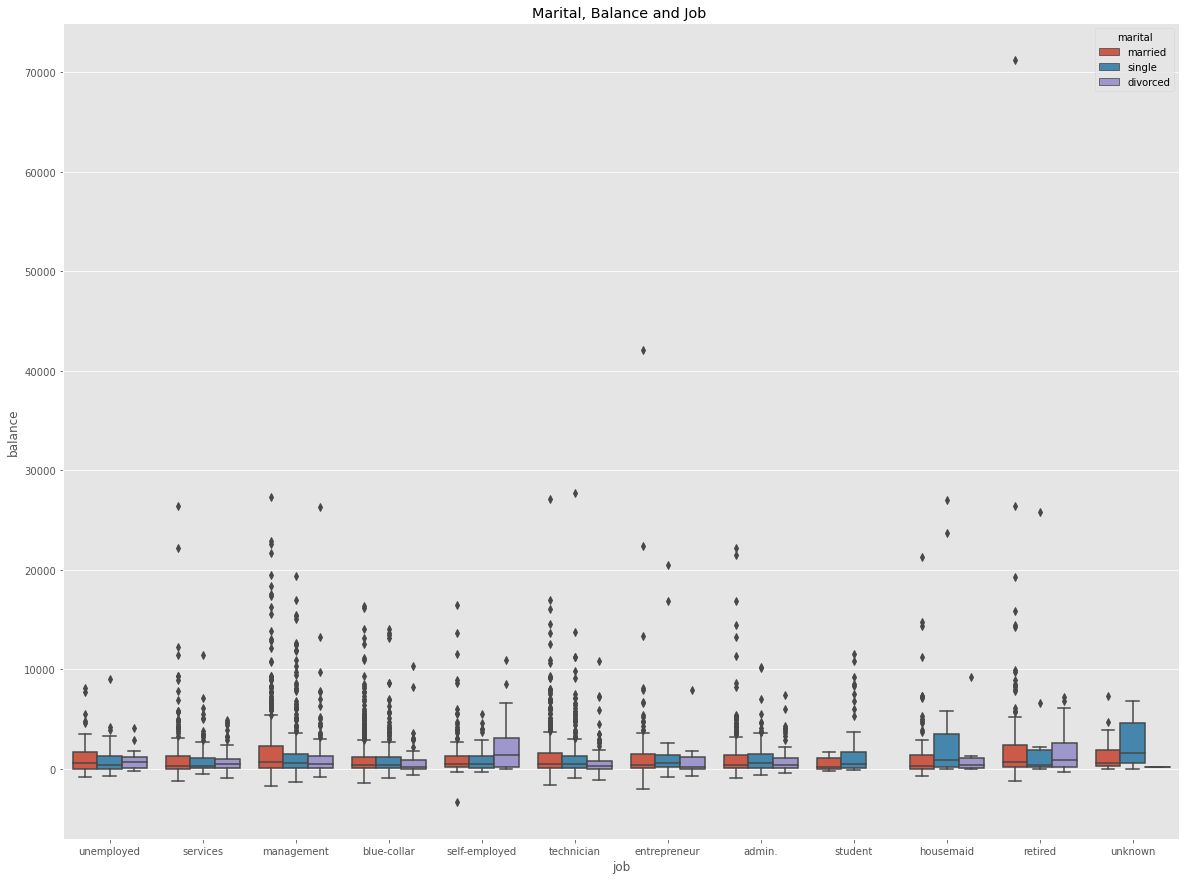

In [54]:
# visualizing marital and job by balance
plt.figure(figsize = (20, 15))
sns.boxplot(x = 'job', y = 'balance', data = df, hue = 'marital')
plt.title('Marital, Balance and Job ')

<Figure size 1440x1080 with 0 Axes>

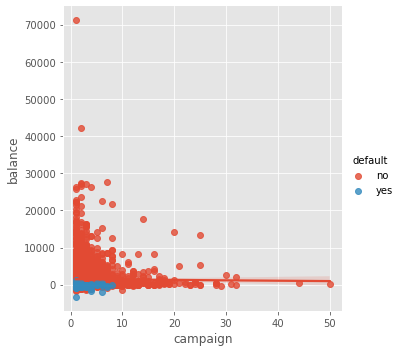

In [55]:
# visualizing default and education apartment by balance

plt.figure(figsize = (20, 15))
sns.lmplot(x = 'campaign', y = 'balance', data = df, hue = 'default')

<Figure size 1440x720 with 0 Axes>

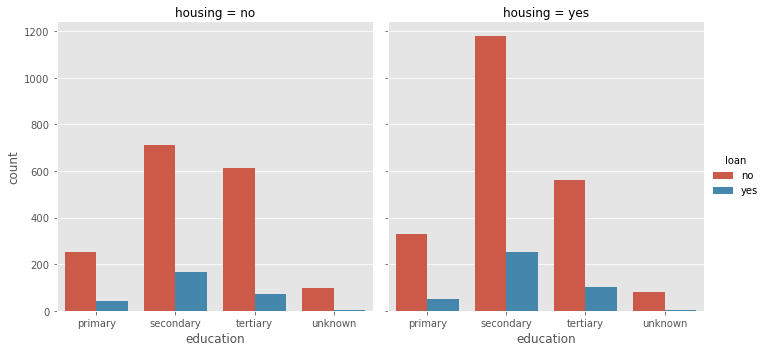

In [56]:
# visualizing housing and education by loan
plt.figure(figsize = (20, 10))
sns.catplot(col = 'housing', x = 'education', kind = 'count', data = df, hue = 'loan')

In [57]:
# Correlation of numerical features
df.corr()

,age,balance,day,duration,campaign,pdays,previous,month_no
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.073764
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.099872
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,0.080436
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,-0.000282
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,0.059214
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,-0.112003
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,-0.037410
month_no,0.073764,0.099872,0.080436,-0.000282,0.059214,-0.112003,-0.037410,1.000000


<AxesSubplot:>

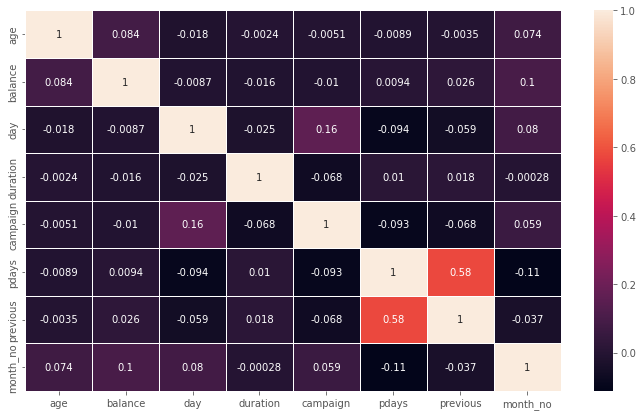

In [58]:
corel = df.corr()
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corel, linewidths = 0.5, annot = True)

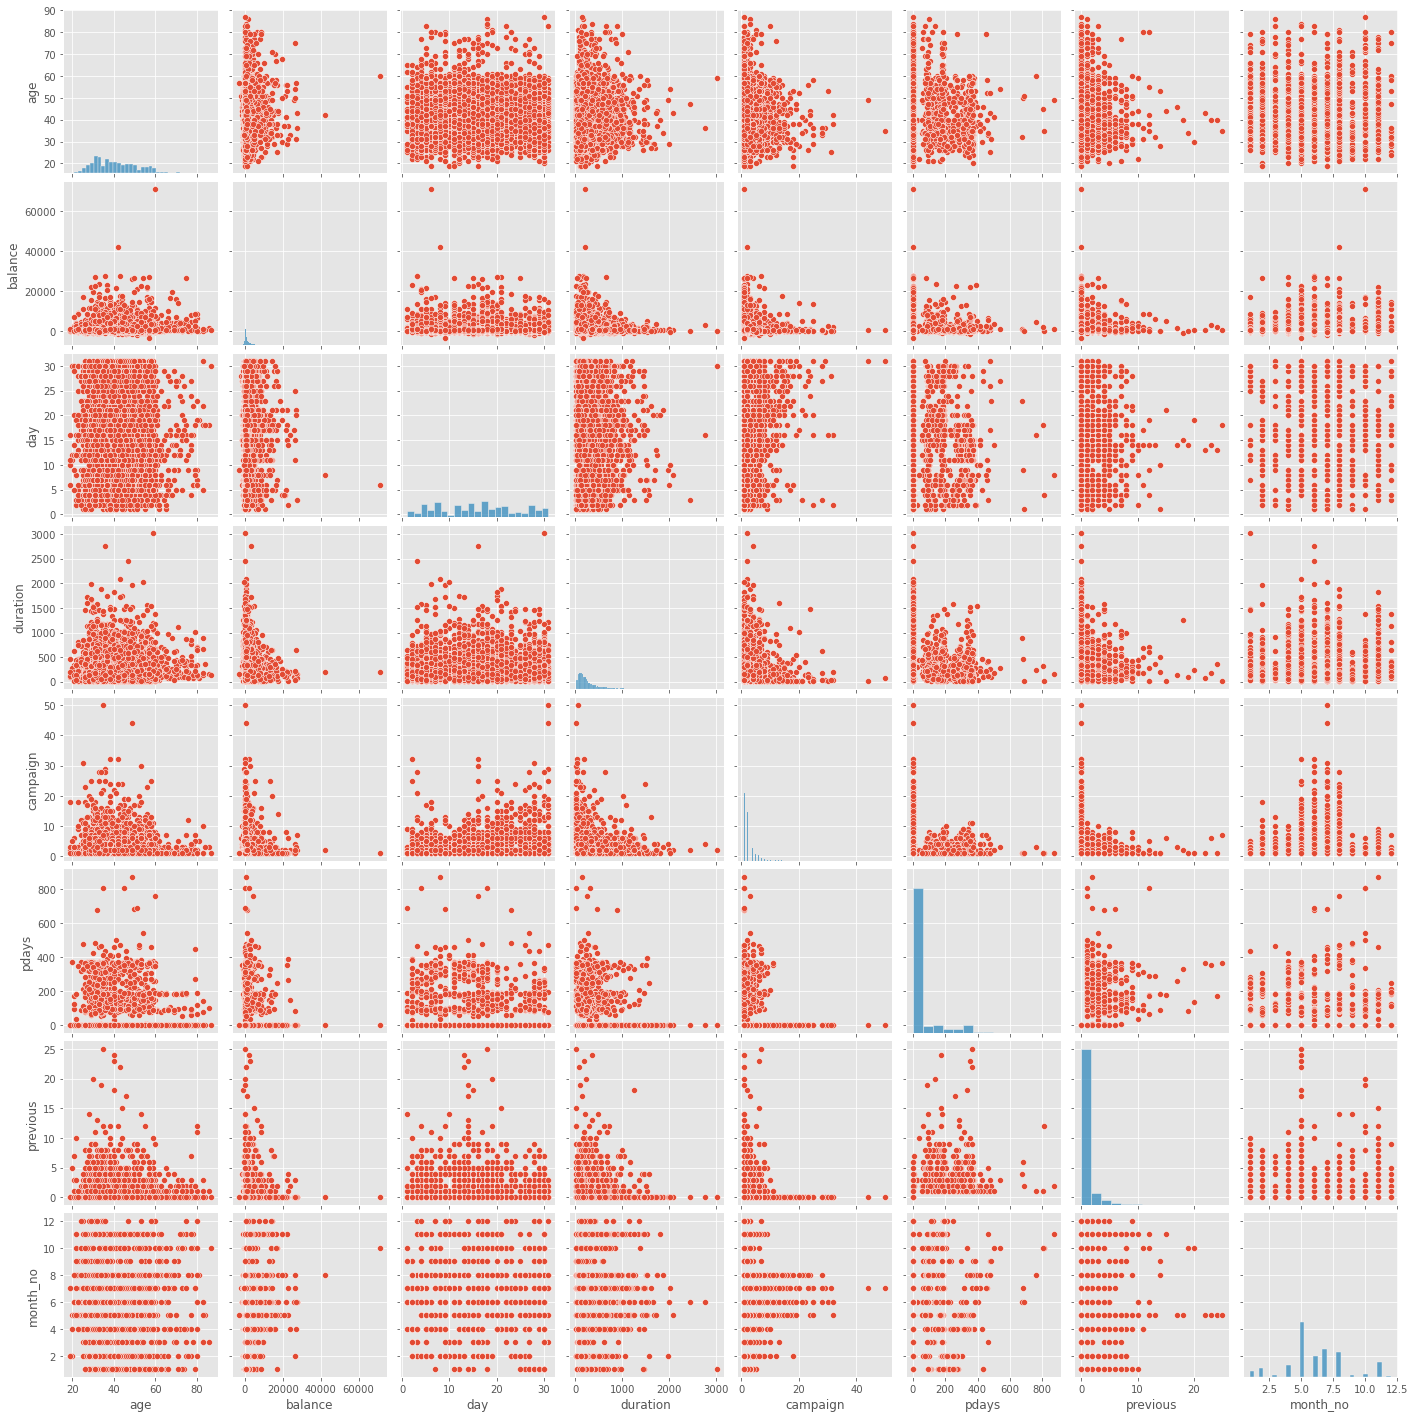

In [59]:
# pairplot for numerical features
sns.pairplot(data = df)

## Preparing Models for Machine Learning

In [60]:
from sklearn import preprocessing

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  target     4521 non-null   object
 17  month_no   4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [62]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target', 'month_no'],
      dtype='object')

In [63]:
# drop the month column, we already have month no.
df = df.drop('month', axis = 1).copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,target,month_no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,no,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,no,5
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,no,4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,no,6
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,no,5


In [64]:
# conditional statement for target
def Target(x):
    if x == 'yes':
        return 1
    else:
        return 0
df['target'] = df['target'].apply(Target)

In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,target,month_no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,0,10
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,0,5
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,0,4
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,0,6
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,0,5


## One-Hot Encoding 
- With one-hot encoding, we can convert categorical feature into numerical. Each value of a column is pivoted into a column of its own. The values in this new column will be either 1 or 0 to show whether that value exist or not.

In [66]:
#1. select the categorical variables and replace pass with your code

categorical = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'poutcome']

In [67]:
#2. we use pd.get_dummies() for one-hot encoding and replace pass with your code

categories_dummies = pd.get_dummies(df[categorical])

# view what you have done
categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [68]:
df[categorical].head()

,job,marital,education,default,housing,loan,contact,poutcome
0,unemployed,married,primary,no,no,no,cellular,unknown
1,services,married,secondary,no,yes,yes,cellular,failure
2,management,single,tertiary,no,yes,no,cellular,failure
3,management,married,tertiary,no,yes,yes,unknown,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,unknown


In [69]:
#3. join the encoded variables back to the main dataframe using pd.concat(), we will now pass both train and categories_dummies
# as a list of their names and pop out a documentation for pd.concat() to clarify

df = pd.concat([df, categories_dummies], axis = 1).copy()

# check what you have done
print(df.shape)
df.head()

(4521, 49)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,1,0,1,0,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,0,1,1,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,1,0,1,0,0,1,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,1,0,0,1,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,1,0,0,0,1,0,0,0,1


In [70]:
#4. remove the initial categorical columns now that we have encoded them. Use the list called categorical to delete all the
# initially selected columns at once, replace pass in the code below

df = df.drop(categorical, axis = 1).copy()
df.head()

,age,balance,day,duration,campaign,pdays,previous,target,month_no,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,10,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,5,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,4,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,6,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,5,226,1,-1,0,0,5,0,...,1,1,0,0,0,1,0,0,0,1


In [71]:
df.shape

(4521, 41)

### Choose the target


In [72]:
# choose a target 
y = df.target

In [73]:
X = df.drop('target', axis = 1)
X.head()

,age,balance,day,duration,campaign,pdays,previous,month_no,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,10,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,220,1,339,4,5,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,4,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,6,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,5,226,1,-1,0,5,0,1,...,1,1,0,0,0,1,0,0,0,1


## Preparing the Models

In [74]:
# Create a train and test dataset

from sklearn.model_selection import train_test_split

# split the dataset with test size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

## Training the model

#### Decision Tree Classifier

In [75]:
# Decision Tree Classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# create the model
DC_model = DecisionTreeClassifier()

# fit the model
DC_model.fit(X_train, y_train)

# create the prediction
DC_preds = DC_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(DC_preds, y_test) * 100)

83.93515106853353


### Observation
- the accuracy score for Decision Tree Classifier is approximately 84.8%

#### Random Forest Classifier

In [76]:
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create model
RF_model = RandomForestClassifier()

# fit the model
RF_model.fit(X_train, y_train)

# create the prediction
RF_preds = RF_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(RF_preds, y_test) * 100)

89.38835666912307


### Observation
- the accuracy score for Random Forest Classifier is approximately 90%

#### K-Nearest Neighbor Classifier

In [77]:
# import the KNeighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# create the model
KN_model = KNeighborsClassifier()

# fit your model
KN_model.fit(X_train, y_train)

# create the prediction
KN_preds = KN_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(KN_preds, y_test) * 100)

86.58806190125277


### Observation
- the accuracy score for K-Nearest Neighbor Classifier is approximately 86.6%

#### Support Vector Machine

In [78]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

# Building a Support Vector Machine on the training set
svc_model = SVC(C = .1, kernel = 'linear', gamma = 1)

# fit the model
svc_model.fit(X_train, y_train)

# create the prediction
SVM_preds = svc_model.predict(X_test)

# print accuracy score
print(accuracy_score(SVM_preds, y_test) * 100)

# check the accuracy on the training set
print(svc_model.score(X_train, y_train) * 100)

90.49373618275608
89.63337547408344


### Observation
- the accuracy score for Support Vector Classifier is approximately 90.5%

#### XG Boost Classifier

In [87]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 3.4 MB/s eta 0:00:00


In [88]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

# fit the model
xgb_clf.fit(X_train, y_train)

# create the prediction
xgb_preds = xgb_clf.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(xgb_preds, y_test) * 100)

89.01989683124539


### Observation
- the accuracy score for XGBoost Classifier is approximately 89.0%

#### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

# create the model
LR_model = LogisticRegression()

# fit the model
LR_model.fit(X_train, y_train)

# create the prediction
LR_preds = LR_model.predict(X_test)

# import accuracy score
from sklearn.metrics import accuracy_score

# print accuracy score
print(accuracy_score(LR_preds, y_test) * 100)

88.50405305821666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Observation
- the accuracy score for Logistic Regression is approximately 88.5%

## Preparing the Models for training and validation

In [109]:
# Confusion Matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

In [110]:
# split into training and validation sets using 30% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)

In [111]:
#create list of your model names
models = [DC_model, RF_model, KN_model, svc_model, xgb_clf, LR_model]

In [112]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
               linecolor = 'white',
               linewidths = 1,
               annot = True,
               fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
# create function to train a model and evaluate accuracy
def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predict on the fitted model
    # print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) # classification report for evaluating our models
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.864406779661017 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1202
           1       0.40      0.38      0.39       155

    accuracy                           0.86      1357
   macro avg       0.66      0.65      0.66      1357
weighted avg       0.86      0.86      0.86      1357



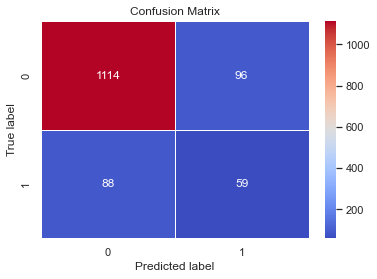


 ForRandomForestClassifier, Accuracy Score is 0.9064112011790715 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1301
           1       0.26      0.68      0.37        56

    accuracy                           0.91      1357
   macro avg       0.62      0.80      0.66      1357
weighted avg       0.96      0.91      0.93      1357



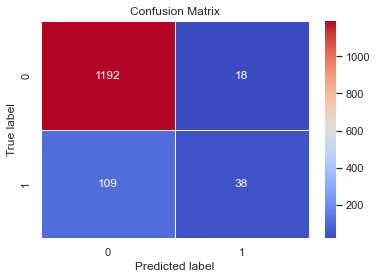


 ForKNeighborsClassifier, Accuracy Score is 0.8843036109064112 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1291
           1       0.19      0.42      0.26        66

    accuracy                           0.88      1357
   macro avg       0.58      0.67      0.60      1357
weighted avg       0.93      0.88      0.90      1357



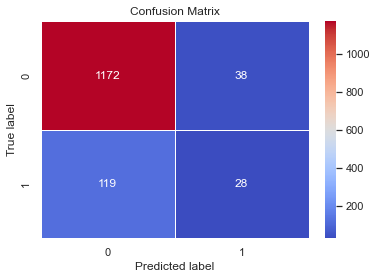


 ForSVC, Accuracy Score is 0.9042004421518055 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1308
           1       0.22      0.67      0.34        49

    accuracy                           0.90      1357
   macro avg       0.61      0.79      0.64      1357
weighted avg       0.96      0.90      0.93      1357



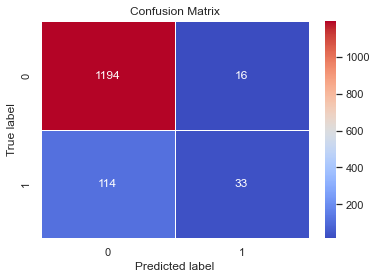


 ForXGBClassifier, Accuracy Score is 0.9064112011790715 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1253
           1       0.42      0.60      0.49       104

    accuracy                           0.91      1357
   macro avg       0.69      0.76      0.72      1357
weighted avg       0.92      0.91      0.91      1357



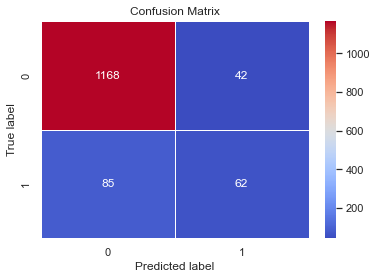


 ForLogisticRegression, Accuracy Score is 0.8887251289609432 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1299
           1       0.18      0.47      0.26        58

    accuracy                           0.89      1357
   macro avg       0.58      0.69      0.60      1357
weighted avg       0.94      0.89      0.91      1357



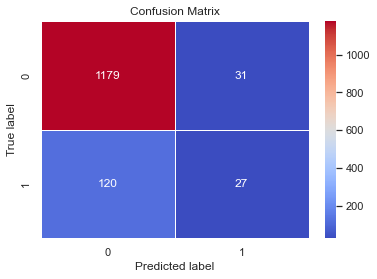

In [115]:
# loop through each model, training in the process..
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

### Observation on Metric Evalaution
- it is observed that XGBoost has accuracy score of 90.6% with a high recall of about 0.6 and 0.42 precision respectively compared to other models that was trained and validated. The implication of that is there is 0.6 likelihood that there will be a bank product uptake while 0.4 won't take a bank product based on the model performance in terms of recall, precision and accuracy. so 42% were predicted accurately, i.e were actually true  while 60% shows that our model predicted accurately.

## Inspect Feature Importances
- Feature importance refers to a technique that calculate a score for all imput features for a given model- the scores simply reperesent the importance of each feature. A higher score means that a specific feature will have a larger effect on the model that has been used to predict our target variable.

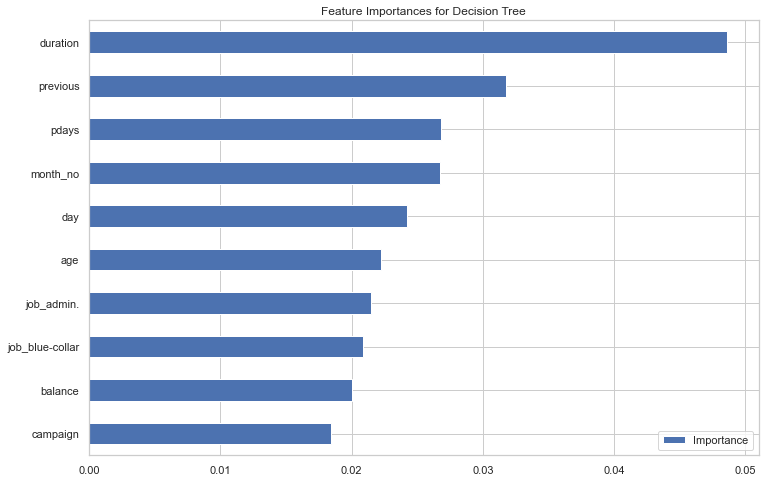

In [126]:
# get feature importance
XGB_importances = pd.DataFrame(data =  xgb_clf.feature_importances_, index = X_valid.columns, columns = ['Importance'])

# plot top 10 feature importance, sorted
XGB_importances[:10].sort_values(by = 'Importance').plot.barh()

plt.title('Feature Importances for Decision Tree')
plt.show()

### Observation
- It is observed that duration and previous class contribute a larger percentage of about 0.048 and 0.032 respectively to the prediction of our target variable on a XGBoost Classifier model that has been trained and validated.

## A Bit of Feature Selection

In [131]:
XGB_importances[: 7].sort_values(by = 'Importance').index.values

array(['campaign', 'balance', 'age', 'day', 'pdays', 'previous',
       'duration'], dtype=object)

In [132]:
# Create a new X train with only 5 features
X_train2 = X_train[['campaign', 'balance', 'age', 'day', 'pdays', 'previous',
       'duration']]
X_train2.head()

,campaign,balance,age,day,pdays,previous,duration
3257,1,1588,31,3,-1,0,14
2507,6,2613,42,30,-1,0,174
3701,1,5108,51,8,102,8,272
4287,14,3337,50,31,-1,0,24
945,3,1066,41,11,-1,0,109


In [134]:
# Create a new X_valid with only 6 features so we can predict on them
X_valid2 = X_valid[['campaign', 'balance', 'age', 'day', 'pdays', 'previous',
       'duration']]

In [135]:
# Train and predict
xgb_clf.fit(X_train2, y_train)
pred2 = xgb_clf.predict(X_valid2)

# Print accuracy score
print(accuracy_score(pred2, y_valid))

0.8975681650700074


### Observation
- it is observed that XGBoost has an accuracy of approximately 89.8% based on the feature importance and selection done in other to see those that contributed most to the model performance and its accuracy when retrained with a training set of the selected features.

## Evaluation with K-Fold Cross Validation
- cross validation, which is sometimes called rotation estimation or out-of-sample testing, is a model validation technique for assessing how the results of a statistical analysis or model performance will fit into an unseen dataset. The main purpose is to to prevent overfitting; which occurs when a model is trained too well on the training dataset and performs poorly on a new, unseen dataset.

In [116]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# prepare the cross-validation procedure
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [117]:
# create a function to train a model with cross validation and evalaute accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1) # evaluate model
    
    print('Accuracy: %.3f' % (mean(scores)))

In [118]:
# train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train, y_train)

Accuracy: 0.856
Accuracy: 0.889
Accuracy: 0.871
Accuracy: 0.893
Accuracy: 0.893
Accuracy: 0.881


In [119]:
# create a function to train a model with cross validation and evalaute precision
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'precision', cv = cv, n_jobs = -1) # evaluate model
    
    print('Precision: %.3f' % (mean(scores)))

In [120]:
# train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train, y_train)

Precision: 0.392
Precision: 0.606
Precision: 0.406
Precision: 0.637
Precision: 0.560
Precision: 0.496


In [123]:
# create a function to train a model with cross validation and evalaute recall
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # evaluate model
    
    print('Recall: %.3f' % (mean(scores)))

In [124]:
# train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train, y_train)

Recall: 0.455
Recall: 0.246
Recall: 0.209
Recall: 0.214
Recall: 0.370
Recall: 0.167


### Summary on K-fold Cross Validation
- it is seen that the XGBoost model has predicted well and can generalize on a new data set based on the average score of 89.3% accuracy and a recall of 37% compared to the other model trained. The model is ready for deployment into an API which Heroku can be used as our deployment platform.